# Exercise 1

In [20]:
values <- c(15.58, 15.9, 16, 16.1, 16.2)
prob1 <- c(.15, .21, .35, .15, .14)
prob2 <- c(.14, .05, .64, .08, .09)

expValue1 <- sum(values*prob1)
expValue2 <- sum(values*prob2)
var1 <- sum(prob1*(values-expValue1)**2)
var2 <- sum(prob2*(values-expValue2)**2)

cat("The expected values are: E[p1] = ", expValue1, "\t E[p2] =", expValue2, "\n")
cat("The variance values are: Var(p1) = ", var1, "\t Var(p2) =", var2)


The expected values are: E[p1] =  15.959 	 E[p2] = 15.9622 
The variance values are: Var(p1) =  0.033979 	 Var(p2) = 0.02816716

# Exercise 2

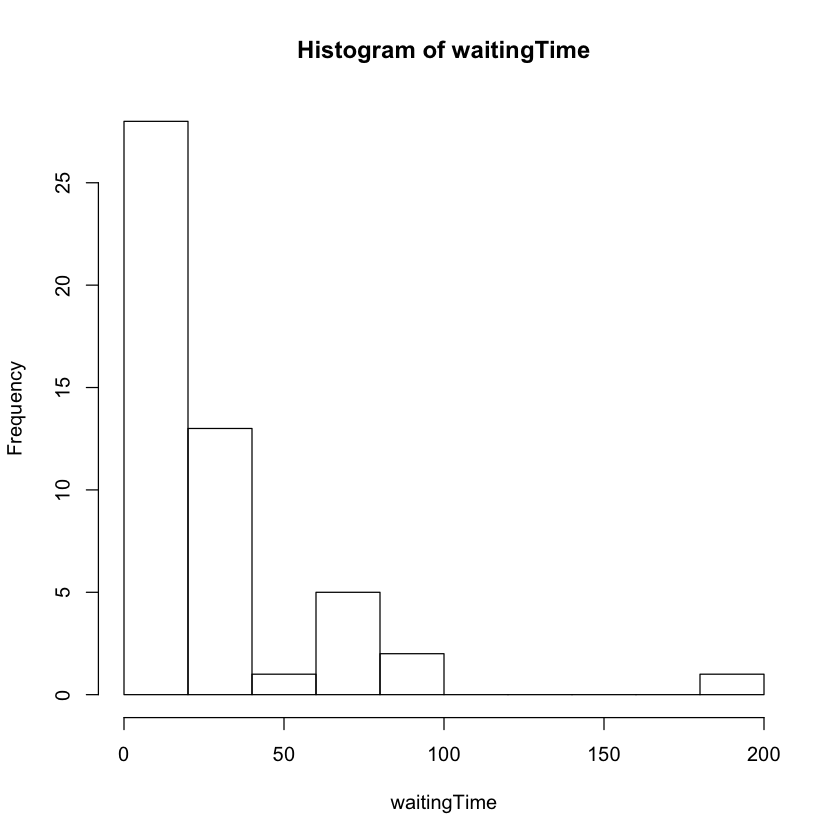

In [21]:
#A

set.seed(2022)

waitingTime <- rexp(50, 1/30)

hist(waitingTime)

In [22]:
#B

rate = 1/30
prob10 <- pexp(10, rate = rate)

cat("The probability to wait less than 10 minutes is: ", prob10)

The probability to wait less than 10 minutes is:  0.2834687

In [23]:
#C

meanWaiting <- mean(waitingTime)
sdWaiting <- sd(waitingTime)
compatibility = abs(meanWaiting-1/rate)/(sqrt(2)*sdWaiting)

cat("The mean waiting time for the sample is", meanWaiting, "minutes even tough the theoretical mean waiting time is", 1/rate, "minutes and the compatibility between these 2 values is:", compatibility)

The mean waiting time for the sample is 28.36846 minutes even tough the theoretical mean waiting time is 30 minutes and the compatibility between these 2 values is: 0.03482085

In [24]:
#D

prob60 <- 1-pexp(60, rate=rate)

cat("The probability to wait more than 1 hour is: ", prob60)

The probability to wait more than 1 hour is:  0.1353353

# Exercise 3


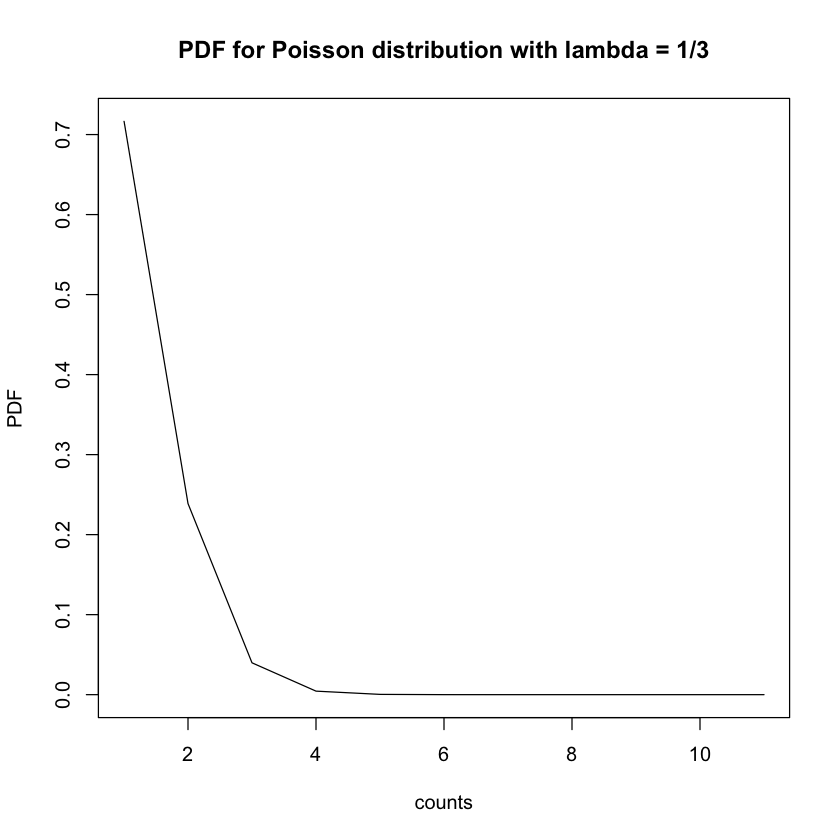

The probability that on a specific page of the book there is at least 1 error is:  0.2834687

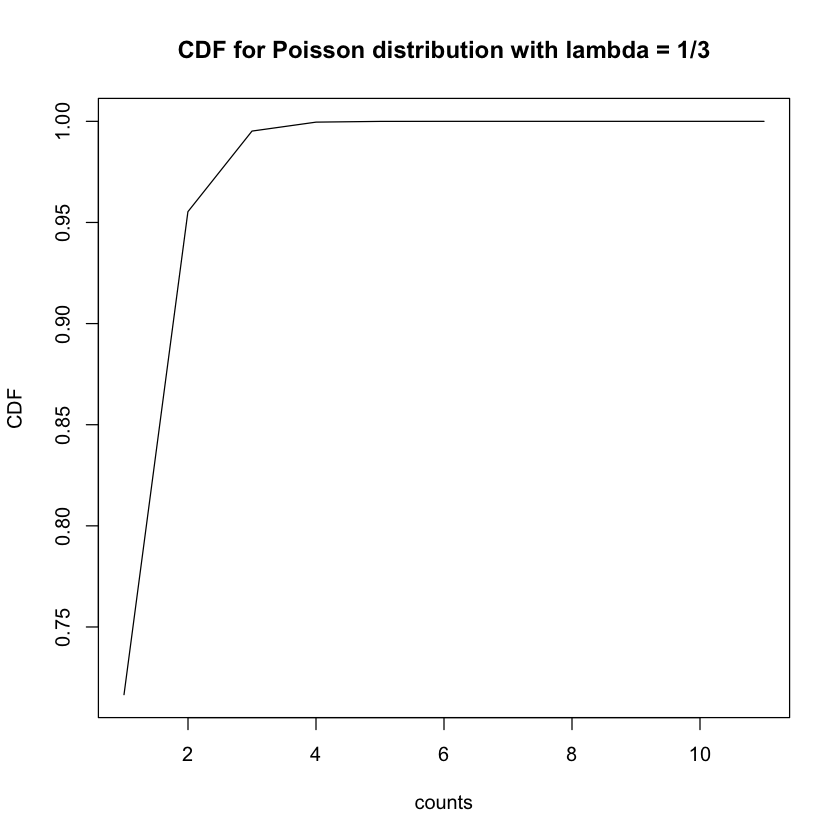

In [25]:
plot(dpois(0:10, lambda=1/3), type="l", xlab="counts", ylab="PDF", main="PDF for Poisson distribution with lambda = 1/3")
plot(ppois(0:10, lambda=1/3), type="l", xlab="counts", ylab="CDF", main="CDF for Poisson distribution with lambda = 1/3")

prob1Error <- sum(dpois(1:10, lambda=1/3))

cat("The probability that on a specific page of the book there is at least 1 error is: ", prob1Error)

# Exercise 4

In [26]:
#The probability of drawing an ace is 1/13 so if replacement is used we have a probability of 1/13 to draw an ace also for every subsequent attempt.
#This implies that we are looking for the probability of NOT drawing an ace for 9 times (10 would be wrong), and so requiring at least 10 draws:

cat("The probability of drawing at least 10 cards before an ace is:", (1-1/13)**9)


The probability of drawing at least 10 cards before an ace is: 0.4865652

# Exercise 5

In [27]:
#a

integrand <- function(t) {(t-1)*(2-t)}
c <- 1/integrate(integrand, 1, 2)$value

cat("The value of the constant c such that the integral is normalized is:", c ,"and this can be verified analitically:")


The value of the constant c such that the integral is normalized is: 6 and this can be verified analitically:

$$ I=\int_{1}^{2}(x-1)(2-x) d x=\frac{-1}{3} x^{3}+\frac{3}{2} x^{2}-\left.2 x\right|_{1} ^{2}=\frac{1}{6} \Longrightarrow c=\frac{1}{I}=6 $$

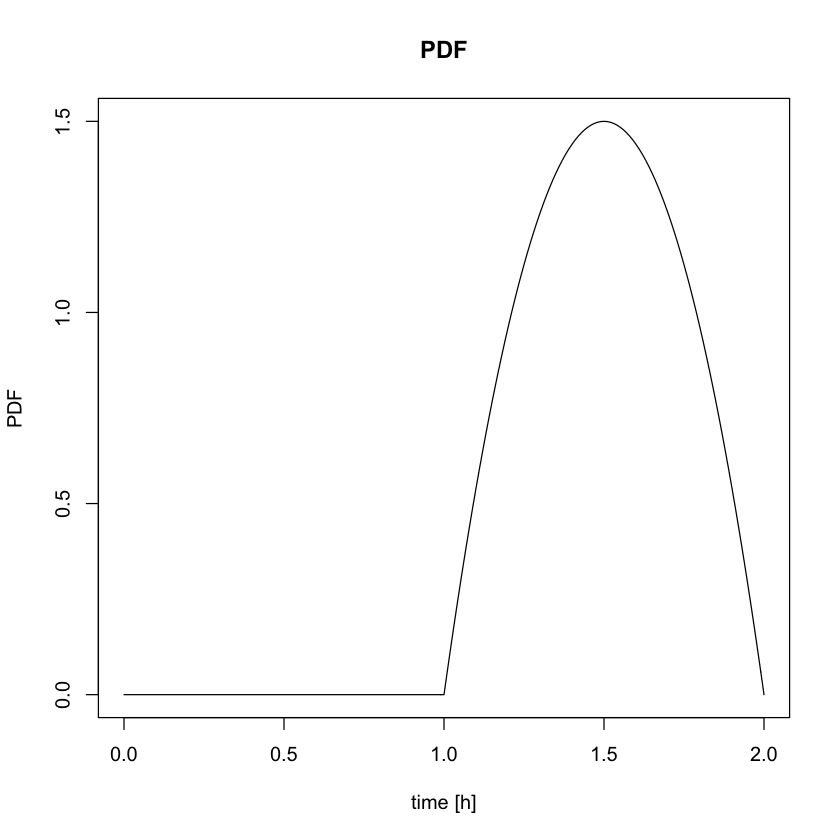

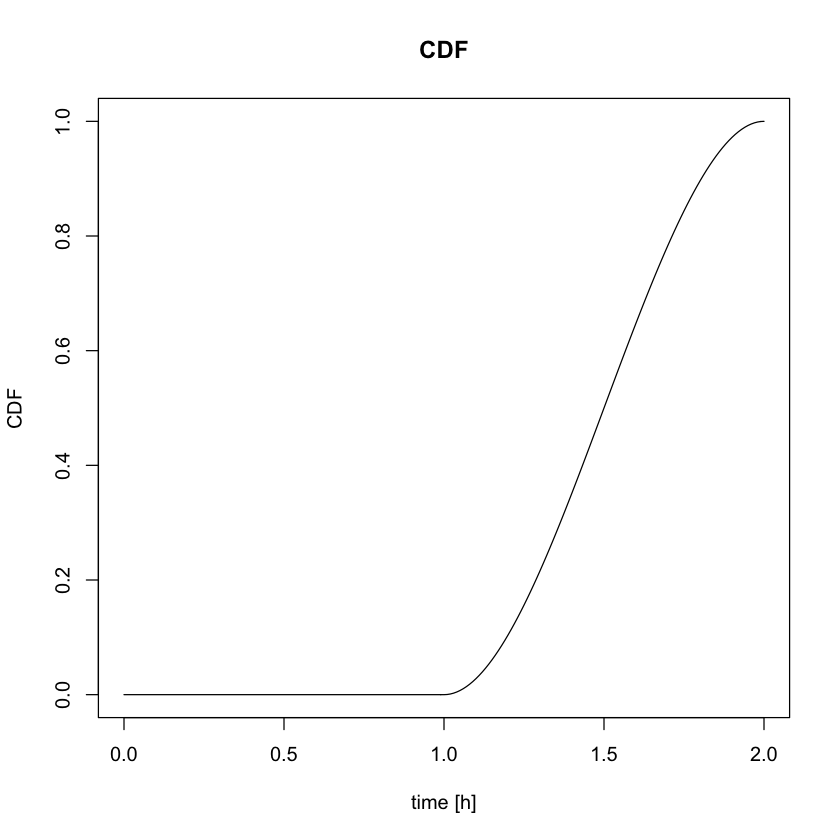

In [28]:
#b

#probability density function
df5 <- function(x, c=6) 
{
    d <- ifelse(x>1 & x<2, c*(x-1)*(2-x), 0)
    return(d)
}


#cumulative distribution function
pf5 <- function(x, c=6)
{
    ifelse( x>=1 & x<=2, p <- c*(-1/6)*((x-1)^2)*(2*x-5), ifelse( x<1, 0, 1))
}


#random samples with pf distribution
rf5 <- function(n) 
{
    u <- runif(n)
    F.inv <- Vectorize(function(y){uniroot(function(x){pf5(x)-y},interval=c(1,2), extendInt='yes', tol=0.0001)$root})
    r <- F.inv(u) 
    return(r)
}


#quantile function
qf5 <- function(p) 
{
    F.inv <- (function(y){uniroot(function(x){pf5(x)-y},interval=c(1,2), extendInt='yes', tol=0.0001)$root})
    return (F.inv(p))
}

x <- seq(0,2,.01)

plot(x, sapply(x, df5), type='l', main='PDF', xlab="time [h]", ylab="PDF")
plot(x, sapply(x, pf5), type='l', main='CDF', xlab="time [h]", ylab="CDF")

In [29]:
#c

cat("The probability that the student will finish the test in more than 75 minutes is:", 1-pf(1.25), "\n")
cat("The probability that the student will finish the test between 90 and 120 minutes is:", pf(2)-pf(1.5))

The probability that the student will finish the test in more than 75 minutes is: 1 
The probability that the student will finish the test between 90 and 120 minutes is: 0

# Exercise 6

If we consider the function $g=10^{4} x$, where $\mathrm{x}$ is a random variable following the distribution function:
$$
f(x)=\left\{\begin{array}{ll}
\frac{2}{x^2} & 1<\mathrm{x}<2 \\
0 & \text { otherwise }
\end{array}\right.
$$
The cumulative function of $x$ is: 
$$
\mathrm{F}(\mathrm{x})=\int_{1}^{x} \frac{2}{t^{2}} d t=-\left.\frac{2}{t}\right|_{1} ^{x}=-\frac{2}{x}+2 \quad 1<x<2
$$
The function $g$ defines a new random variable $Y=g(x)$, that will follow the distribution function:
$$
f_{Y}(y)=f_{X}(h(y))\left|\frac{d h(y)}{d y}\right|=\left\{\begin{array}{ll}
\frac{2}{10^{-4} y^{2}} & 10000<\mathrm{y}<20000 \\
0 & \text { otherwise }
\end{array}\right.
$$
in which $h=g^{-1}=10^{-4} y$.
The cumulative distribution of $Y, F_{Y}(y)$ is given by:
$$
\left.F_{Y}(y)=P(g(x) \leq)\right)=P(X \leq h(y))=F_{x}(h(y))=-\frac{2}{10^{-4} y}+2 \quad \text { if } 10000<y<20000
$$

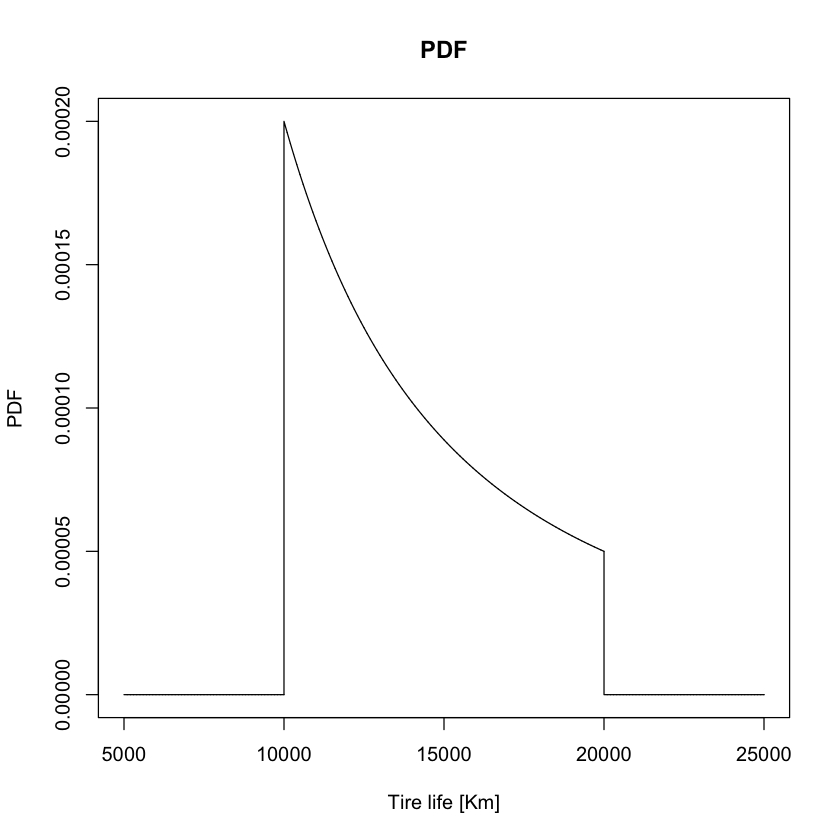

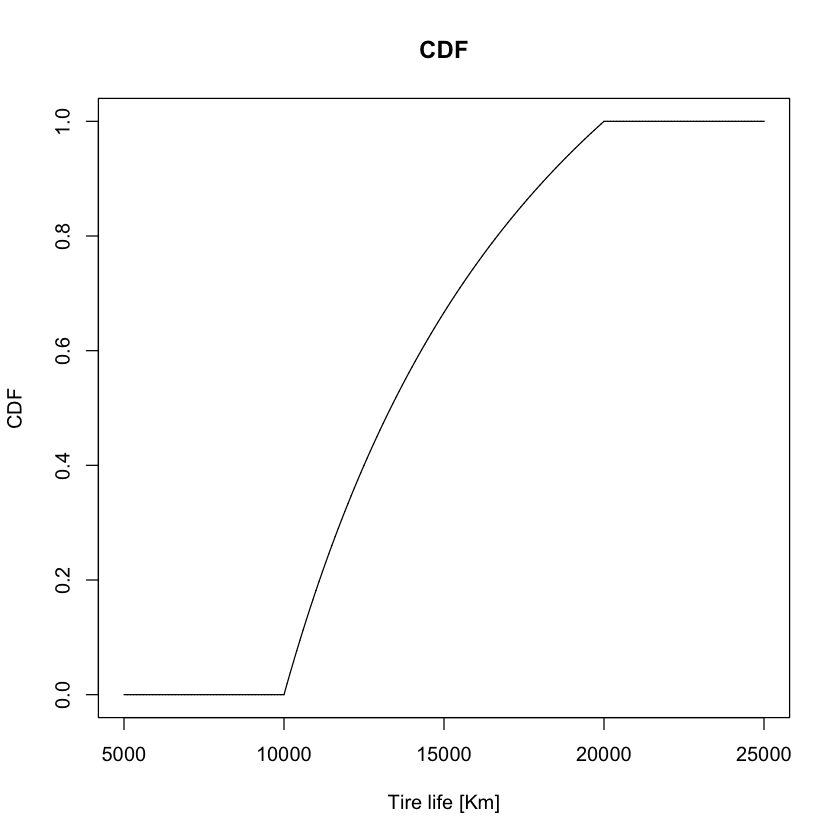

In [30]:
#a

#probability density function
df6 <- function(y) {
    d <- ifelse (y>=10000 & y<=20000, 2/(10^(-4)*y^2), 0)
    return (d)
}

#cumulative distribution function
pf6 <- function(y) {
    p <- ifelse (y>10000 & y<20000, (-2/(10^(-4)*y)+2), ifelse(y<=10000, 0, 1))
    return(p)
}

#random samples with pf distribution
rf6 <- function(n) {
    u <- runif(n)
    F.inv <- Vectorize(function(y){uniroot(function(x){pf6(x)-y},interval=c(10000,20000), extendInt='yes', tol=0.0001)$root})
    r <- F.inv(u) 
    return(r)
}

#quantile function
qf6 <- function(p) {
    F.inv <- (function(y){uniroot(function(x){pf6(x)-y},interval=c(10000,20000), extendInt='yes', tol=0.0001)$root})
    return (F.inv(p))
}

x <- seq(5000,25000,1)

plot(x, sapply(x, df6), type='l', main='PDF', xlab="Tire life [Km]", ylab="PDF")
plot(x, sapply(x, pf6), type='l', main='CDF', xlab="Tire life [Km]", ylab="CDF")

In [33]:
#b

cat("The probability that the tire will last less than 15000 Km is:", pf6(15000))

The probability that the tire will last less than 15000 Km is: 0.6666667

In [34]:
#c

samples <- rf(3000)
mean <- mean(samples)
variance <- mean(samples^2)-mean^2
cat("The mean value of the 3000 samples is:", mean,"Km and the variance is:",variance, "Km")

The mean value of the 3000 samples is: 13857.19 Km and the variance is: 7962597 Km